# Seaborn - Data Visualization

In this notebook we are going to plot different types of charts using Seaborn

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import matplotlib as mpl

## Loading Data

In [2]:
#Loading all the necessary data
pokemon_data = pd.read_csv("./data/pokemon_updated.csv")
student_data = pd.read_csv("./data/studentp.csv")
countries_aggr_data = pd.read_csv("./data/countries-aggregated.csv",index_col="Date",parse_dates=True)
housing_data = pd.read_csv("./data/housing.csv")
insurance_data = pd.read_csv("./data/insurance.csv")
helpdesk_data = pd.read_csv("./data/helpdesk.csv")
fish_data = pd.read_csv("./data/fish.csv")
canada_data = pd.read_csv("./data/canada.csv")
spotify_data = pd.read_csv("./data/spotify.csv",index_col="Date",parse_dates=True)
unemployment_data = pd.read_excel("./data/unemployment.xlsx")
exercise_data = pd.read_csv("./data/exercise.csv")
suicide_data = pd.read_csv("./data/suicide.csv")
life_exp_data = pd.read_csv("./data/Life Expectancy Data.csv")
adult_data = pd.read_csv("./data/adult.csv")
iris_data = sns.load_dataset("iris")
cars_data = pd.read_csv("./data/cars.csv")

## Processing data

In [5]:
canada_data.drop(columns=['Type','Coverage','AREA',"AreaName",'DEV','REG','RegName','DevName'],inplace=True) #dropping unnescessary columns
#Changing the column name and make it as a column
canada_data.rename(columns={'OdName':'Country'},inplace=True)
canada_data.set_index(canada_data.Country,inplace=True)

# dropping country column in data
canada_data.index.name=None
del canada_data['Country']

# Transposing the data row to columns
canada_data = canada_data.transpose()
canada_data.head()


Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980           16        1       80               0        0       1   
1981           39        0       67               1        0       3   
1982           39        0       71               0        0       6   
1983           47        0       69               0        0       6   
1984           71        0       63               0        0       4   

      Antigua and Barbuda  Argentina  Armenia  Australia  ...  Uzbekistan  \
1980                    0        368        0        702  ...           0   
1981                    0        426        0        639  ...           0   
1982                    0        626        0        484  ...           0   
1983                    0        241        0        317  ...           0   
1984                   42        237        0        317  ...           0   

      Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  Western Sahara  \
1980        0                                 103      1191               0   
1981        0                                 117      1829               0   
1982        0                                 174      2162               0   
1983        0                                 124      3404               0   
1984        0                                 142      7583               0   

      Yemen  Zambia  Zimbabwe  Unknown   Total  
1980      1      11        72    44000  143137  
1981      2      17       114    18078  128641  
1982      1      11       102    16904  121175  
1983      6       7        44    13635   89185  
1984      0      16        32    14855   88272  

[5 rows x 197 columns]

In [6]:
# Selecting rows which are having workclass as a Private , State-gov,Federal-gov
adult_data = adult_data[adult_data['workclass'].isin(['Private','State-gov','Federal-gov'])]

In [7]:
# Creating simple data using numpy
x1 = np.linspace(0,10,1000)
x2 = np.sin(x1)
df = pd.DataFrame({'input':x1,'target':x2})
df.head()

input    target
0  0.00000  0.000000
1  0.01001  0.010010
2  0.02002  0.020019
3  0.03003  0.030026
4  0.04004  0.040029

## Lineplot

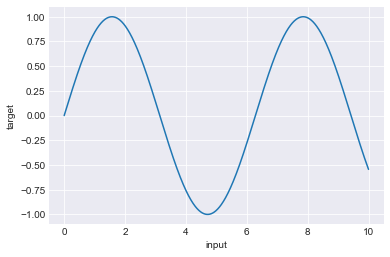

In [9]:
# making line plot using seaborn
plt.style.use('seaborn-darkgrid') # setting background theme using matplotlib package
sns.lineplot(x=df.input,y=df.target,data=df)
plt.show()

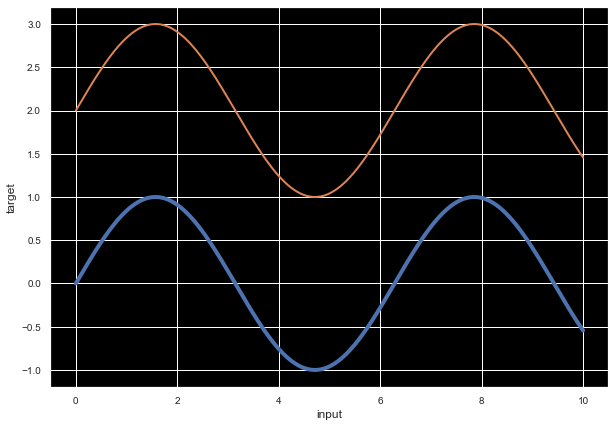

In [11]:
"""
Changing the background color of the plot
axes.facecolor - background color of the plot 
axes.grid - is used for grid line behind the plot

Plotting two line plots in one plot
"""

plt.figure(figsize=(10,7)) # size of the plot W,H
sns.set(rc={'axes.facecolor':'#000','axes.grid':True,
           'xtick.labelsize':10,'ytick.labelsize':10})
sns.lineplot(x=df.input,y=df.target, data = df , linewidth=4)
sns.lineplot(x=df.input,y=df.target+2,data = df,linewidth = 2)
plt.show()

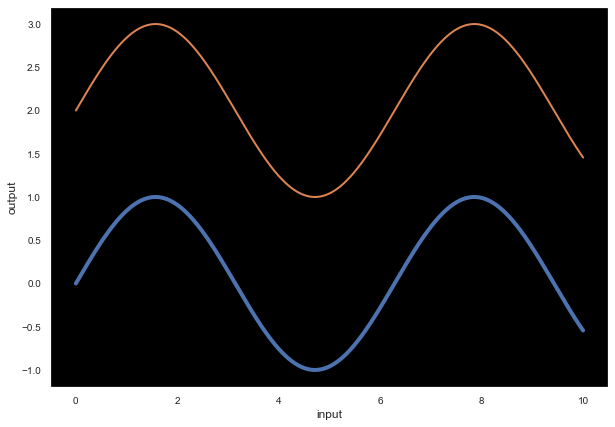

In [10]:
# Turn off the grid lines using axes.grid= False
plt.figure(figsize=(10,7))
sns.set(rc={'axes.facecolor':'#000','axes.grid':False,
           'xtick.labelsize':10,'ytick.labelsize':10})
sns.lineplot(x=df.input,y=df.output, data=df , linewidth=4)
sns.lineplot(x=df.input,y=df.output+2,data=df,linewidth = 2)
plt.show()

In [12]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [18]:
spotify_data.tail()

Shape of You  Despacito  Something Just Like This    HUMBLE.  \
Date                                                                       
2018-01-05       4492978  3450315.0                 2408365.0  2685857.0   
2018-01-06       4416476  3394284.0                 2188035.0  2559044.0   
2018-01-07       4009104  3020789.0                 1908129.0  2350985.0   
2018-01-08       4135505  2755266.0                 2023251.0  2523265.0   
2018-01-09       4168506  2791601.0                 2058016.0  2727678.0   

            Unforgettable  
Date                       
2018-01-05      2869783.0  
2018-01-06      2743748.0  
2018-01-07      2441045.0  
2018-01-08      2622693.0  
2018-01-09      2627334.0

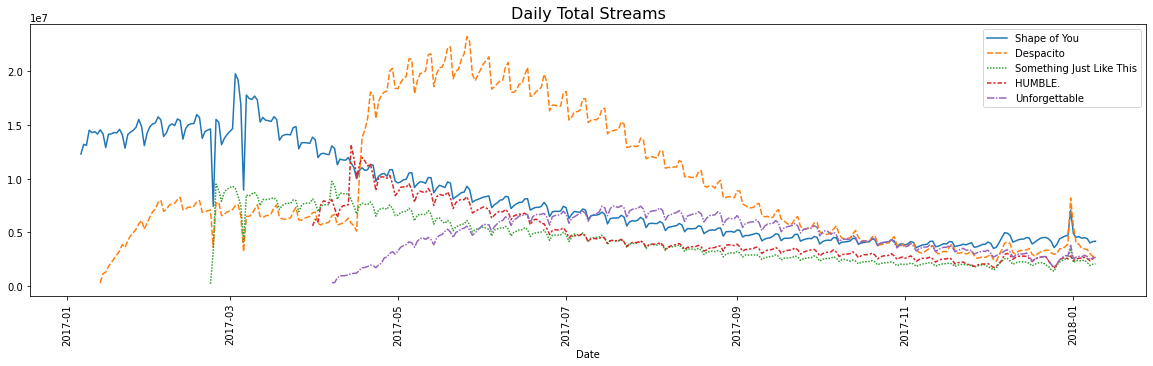

In [29]:
"""
    Plotting all the data in spotify_data by using one command
    if we use matplotlib it would require multiple lines of code to acheive the same.
"""
plt.figure(figsize=(20,5))
sns.lineplot(data=spotify_data)
plt.title('Daily Total Streams',fontsize=16) # Setting title of the plot
plt.xticks(rotation=90) # changing the direction of the xlabel - to avoid overlapping on the other label
plt.show()

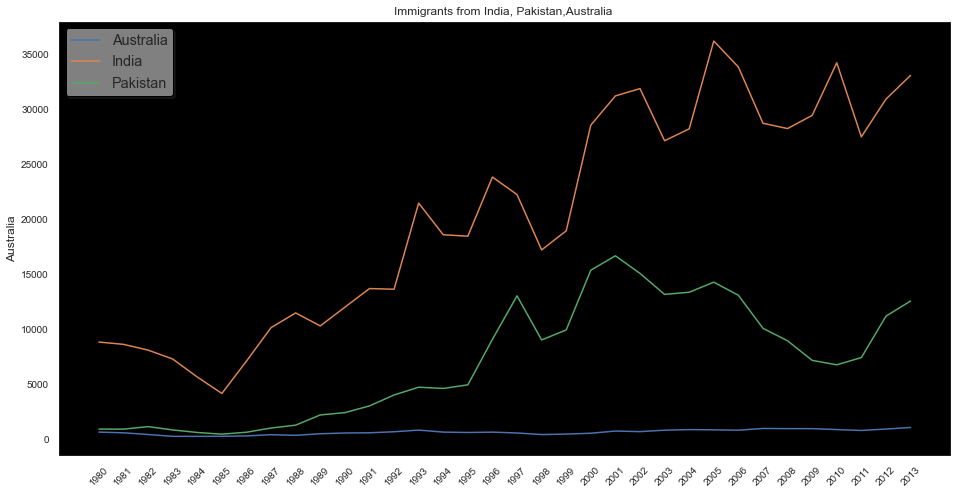

In [13]:
"""
   Filtering rows by Country column using pandas 
    Changing the legend default styling by using plt.legend function
"""

sns.set(rc={"axes.facecolor":"#000","xtick.labelsize":10,
           'ytick.labelsize':10,"axes.grid":False})
plt.figure(figsize=(16,8))
plt.title('Immigrants from India, Pakistan,Australia')
plt.xticks(rotation=45)
sns.lineplot(x=canada_data.index.values,y=canada_data['Australia'],label='Australia')
sns.lineplot(x=canada_data.index.values,y=canada_data['India'],label='India')
sns.lineplot(x=canada_data.index.values,y=canada_data['Pakistan'],label='Pakistan')
plt.legend(facecolor="grey",fontsize='large',shadow=True,edgecolor='black')
plt.show()

In [14]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

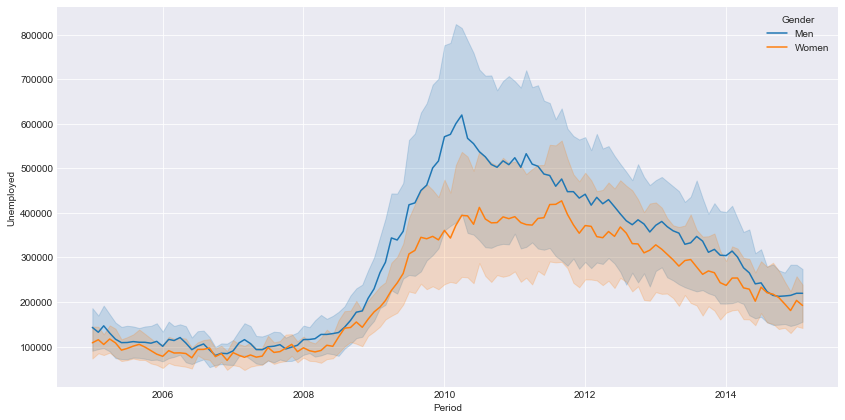

In [15]:
"""
    Grouping the data by using a specified column , hue = column_name
"""
plt.figure(figsize=(14,7))
plt.style.use("seaborn-darkgrid")
sns.lineplot(x="Period",y="Unemployed",hue="Gender",data=unemployment_data)
plt.show()

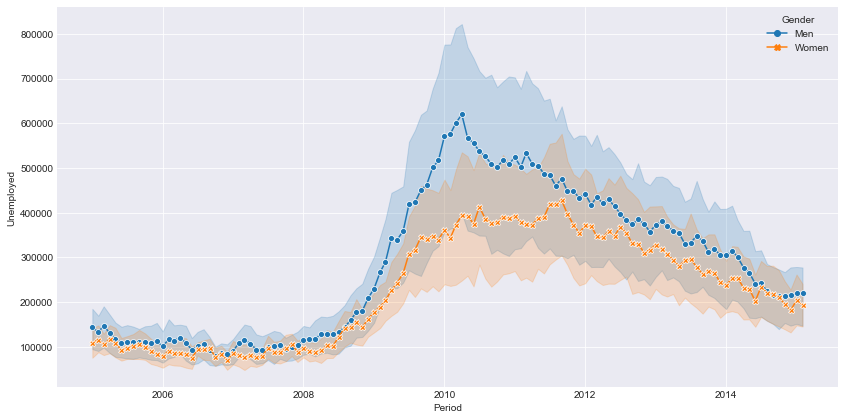

In [37]:
"""
    Grouping the data and marking it by differnt chars , style = column_name and markers=True
"""

plt.figure(figsize=(14,7))
plt.style.use("seaborn-darkgrid")
sns.lineplot(x="Period",y="Unemployed",hue="Gender",style="Gender",markers=True,dashes=False,data=unemployment_data)
plt.show()

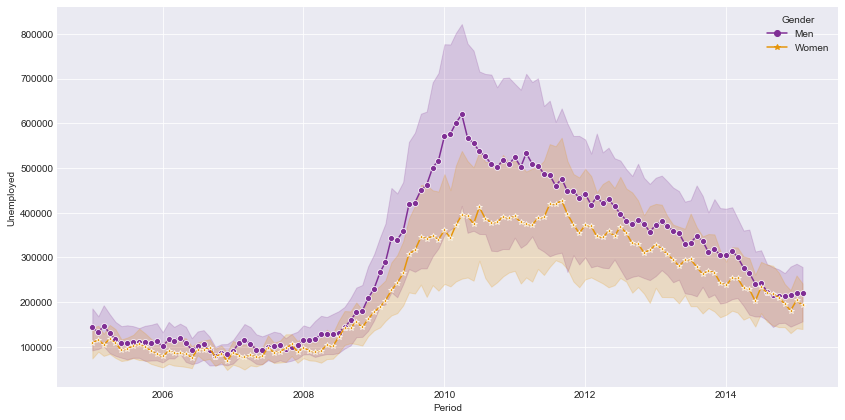

In [20]:
"""
    Grouping the data and marking the data by using custom markers , markers = Arraylist
"""
plt.figure(figsize=(14,7))
plt.style.use("seaborn-darkgrid")
sns.lineplot(x="Period",y="Unemployed",hue="Gender",style="Gender",markers=["o","*"],dashes=False,palette='CMRmap',data=unemployment_data)
plt.show()

In [39]:
unemployment_data['Age'].value_counts().index

Index(['16 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 64 years', '65 years and over'],
      dtype='object')

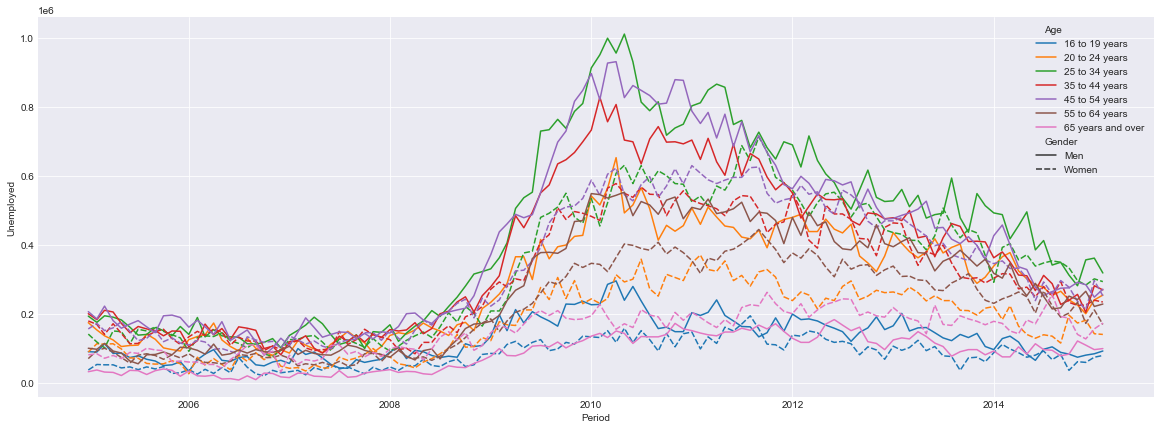

In [40]:
"""
    Grouping the data by Age and Gender
    Gender(2 categories) - Male and Female
    Age(7 categories) - '16 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 64 years', '65 years and over'
    2*7 = 14 line plots
"""
plt.figure(figsize=(20,7))
sns.lineplot(x="Period",y="Unemployed",data=unemployment_data
            ,hue="Age",style="Gender")
plt.show()

In [51]:
emp = unemployment_data[unemployment_data['Period'].between('2005-01-01','2006-01-01',inclusive=True)]
emp.tail()

Age Gender     Period  Unemployed
177     25 to 34 years  Women 2006-01-01       92000
178     35 to 44 years  Women 2006-01-01      134000
179     45 to 54 years  Women 2006-01-01      110000
180     55 to 64 years  Women 2006-01-01       85000
181  65 years and over  Women 2006-01-01       61000

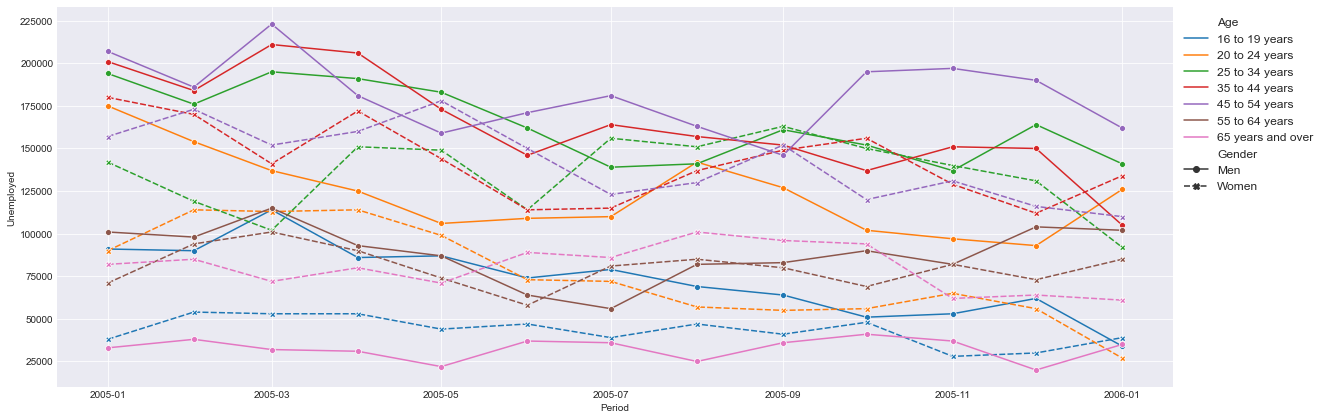

In [45]:
"""
    Instead of Aggerating the data , displaying values of all the age and gender in the data by using units attribute
"""
plt.figure(figsize=(20,7))
sns.lineplot(x="Period",y="Unemployed",data=emp,
            hue="Age",style="Gender",units="Gender",markers=True,estimator=None)
plt.legend(bbox_to_anchor=(1.0,1.0),fontsize='large') # used to place the legend outside of the plot
plt.show()

## Relplot

<Figure size 1440x504 with 0 Axes>

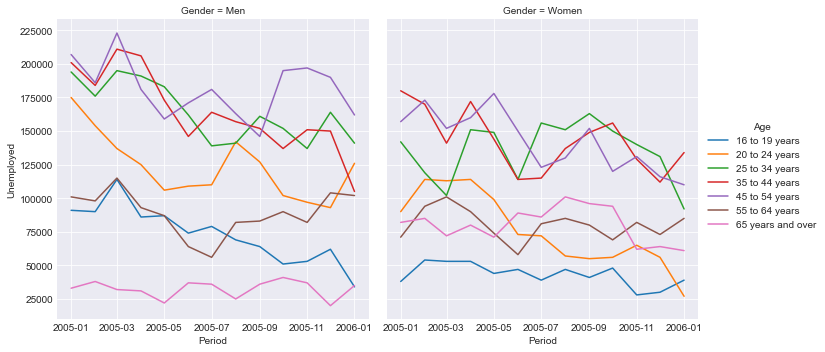

In [60]:
"""
    Spliting the plots by Gender column
"""
plt.figure(figsize=(20,7))
sns.relplot(x="Period",y="Unemployed",data=emp,
            hue="Age",col="Gender",kind="line")
plt.show()

<Figure size 720x504 with 0 Axes>

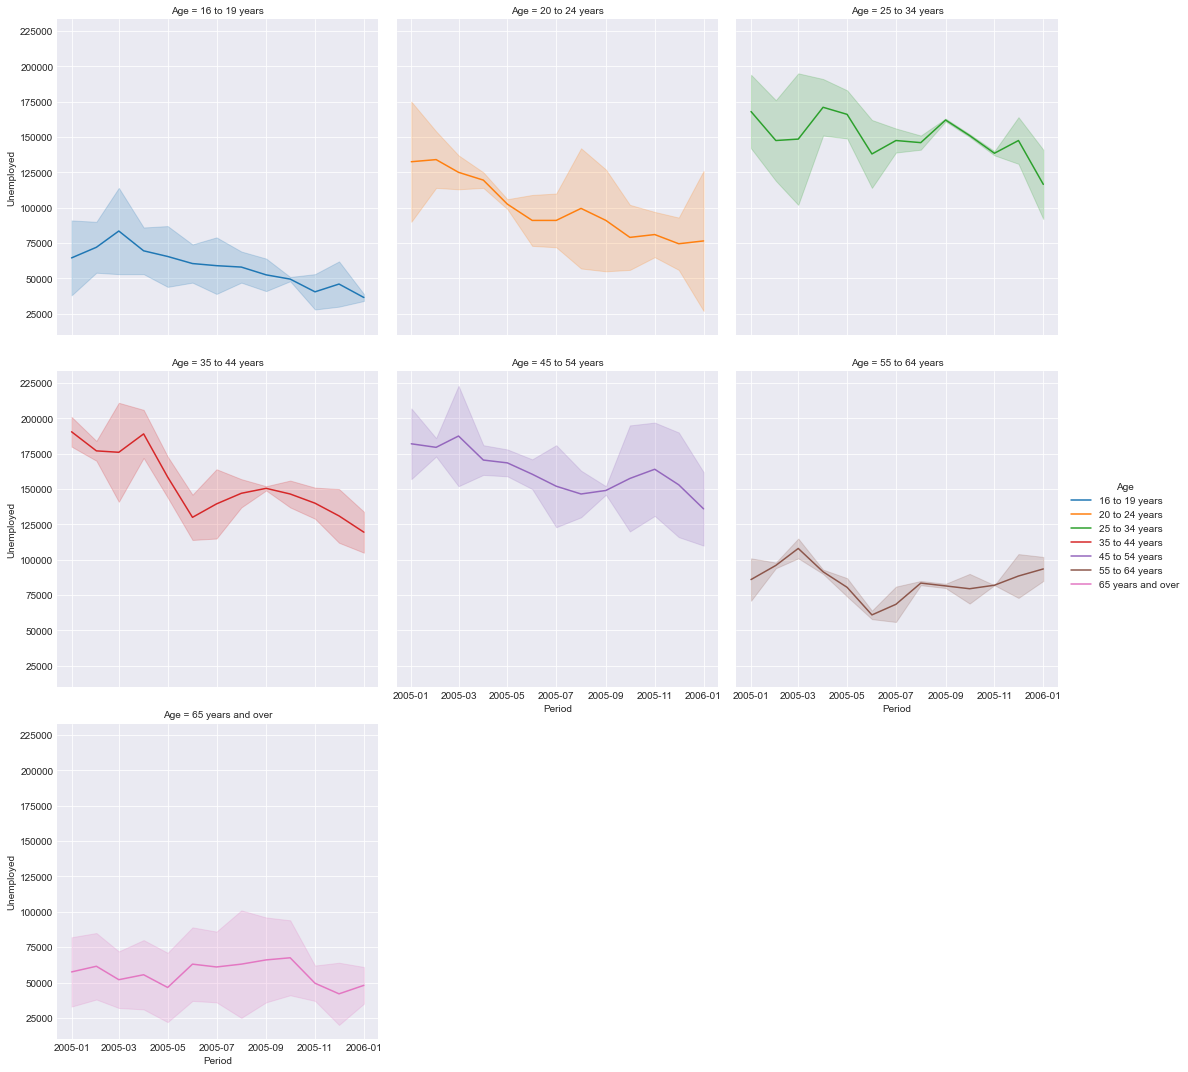

In [62]:
"""
    Plotting lineplots by column(Age) with 3 columns(col_wrap)
    col_wrap - will be applicable only when using col attribute
"""
plt.figure(figsize=(10,7))
sns.relplot(x="Period",y="Unemployed",col="Age",data=emp,hue='Age',kind='line',col_wrap=3)
plt.show()

<Figure size 720x504 with 0 Axes>

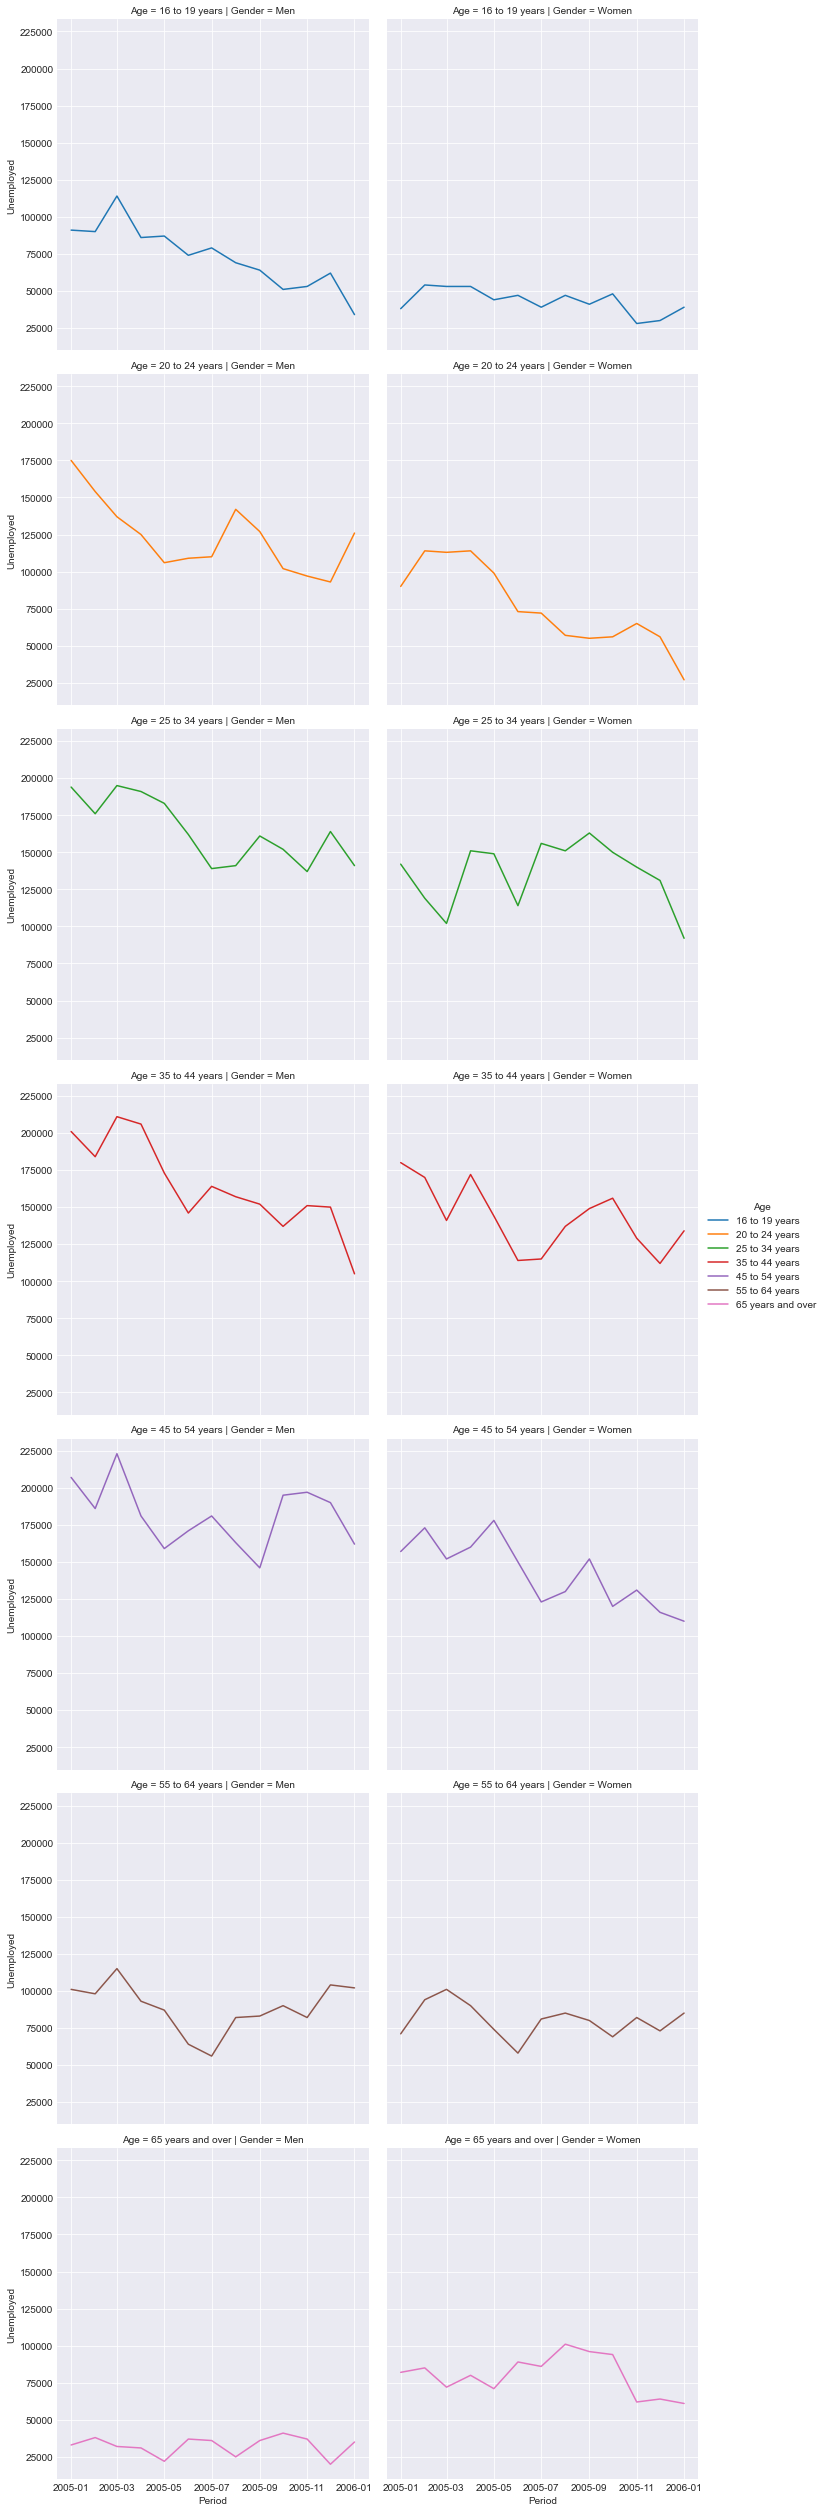

In [64]:
"""
    Plotting lineplots by Row(Age) and column(Gender)
"""
plt.figure(figsize=(10,7))
sns.relplot(x="Period",y="Unemployed",col="Gender",row="Age",data=emp,hue='Age',kind='line')

In [65]:
#Restoring to default
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Scatterplot

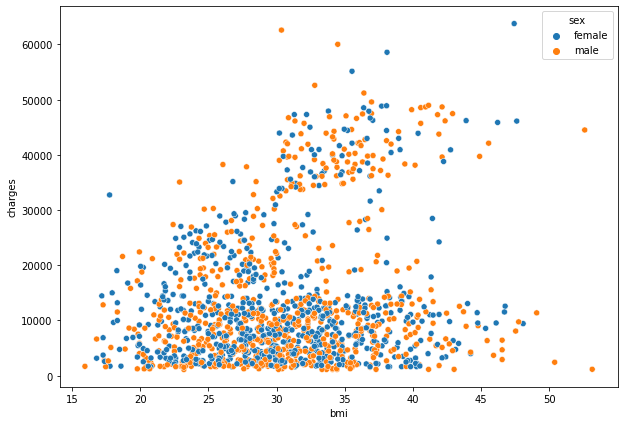

In [29]:
"""
    Grouping data by Sex in the scatter plot
"""
plt.figure(figsize=(10,7))
sns.scatterplot(x=insurance_data.bmi,y=insurance_data.charges,hue=insurance_data.sex)
plt.show()

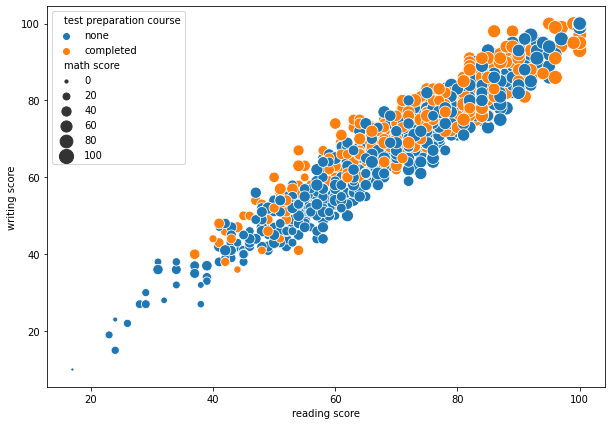

In [71]:
"""
    Changing the size of the value by Math score - ranges b/w 10 to 200 
"""
plt.figure(figsize=(10,7))
sns.scatterplot(x=student_data['reading score'],y=student_data['writing score'],hue=student_data['test preparation course'],size=student_data['math score'],sizes=(10,200))
plt.show()

<Figure size 720x504 with 0 Axes>

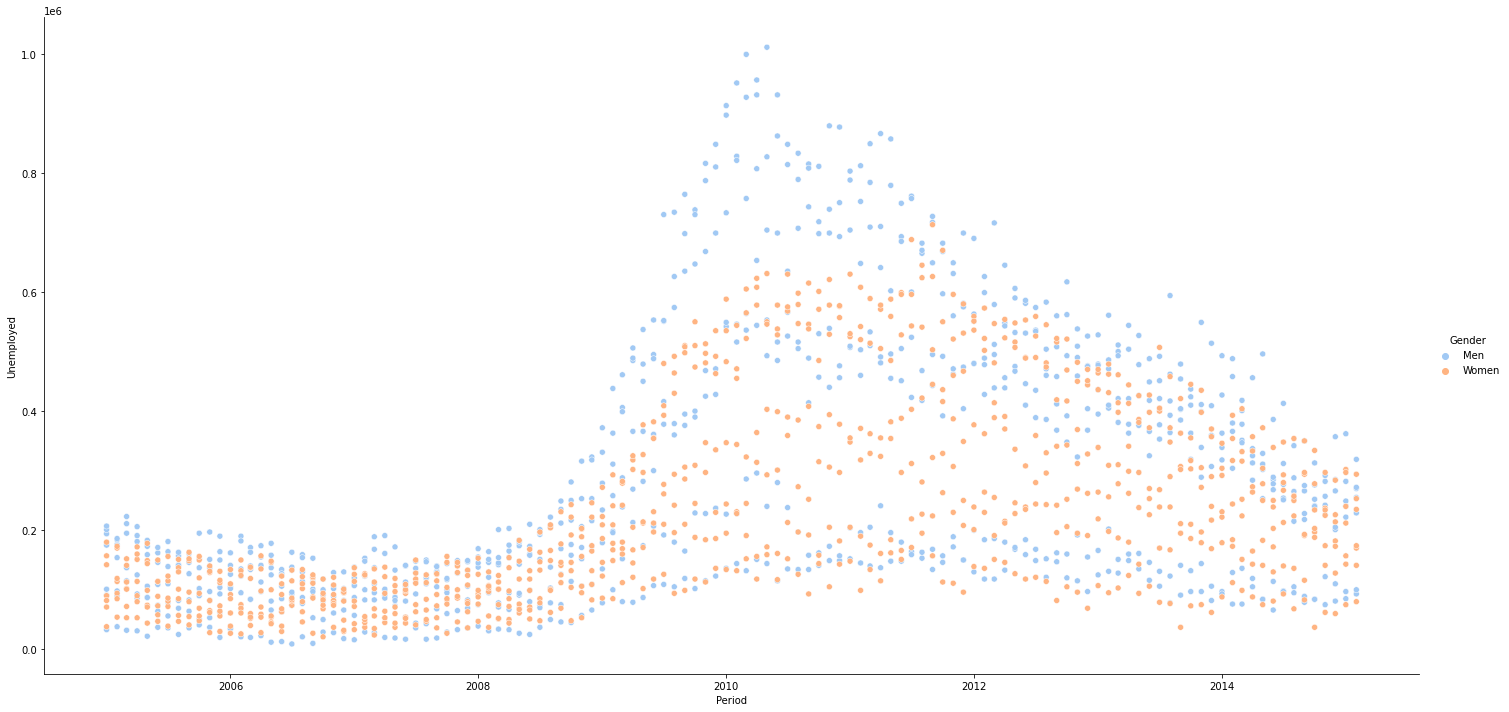

In [31]:
## Relplot for Scatter plot
plt.figure(figsize=(10,7))
sns.relplot(palette="pastel",x=unemployment_data['Period'],y=unemployment_data['Unemployed'],hue=unemployment_data["Gender"],height=10,aspect=2)
plt.show()

In [32]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

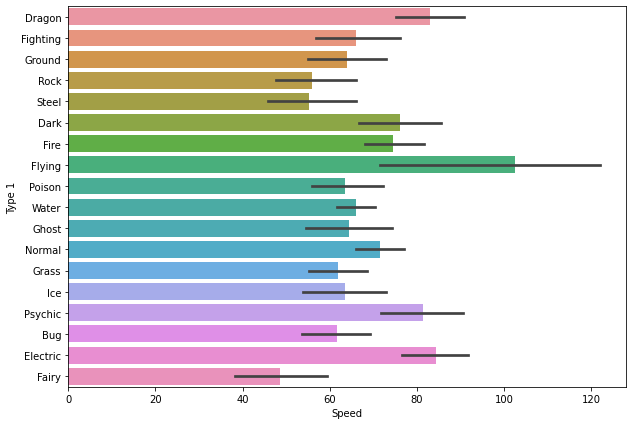

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x=pokemon_data['Speed'],y=pokemon_data['Type 1'],order=pokemon_data.groupby(['Type 1']).mean().sort_values('Attack',ascending=False).index.values)
plt.show()

In [34]:
pokemon_data.groupby(['Type 1']).mean().sort_values('Defense',ascending=False)

#         HP      Attack     Defense    Sp. Atk    Sp. Def  \
Type 1                                                                          
Steel     442.851852  65.222222   92.703704  126.370370  67.518519  80.629630   
Rock      392.727273  65.363636   92.863636  100.795455  63.340909  75.477273   
Dragon    474.375000  83.312500  112.125000   86.375000  96.843750  88.843750   
Ground    356.281250  73.781250   95.750000   84.843750  56.468750  62.750000   
Ghost     486.500000  64.437500   73.781250   81.187500  79.343750  76.468750   
Water     303.089286  72.062500   74.151786   72.946429  74.812500  70.517857   
Ice       423.541667  72.000000   72.750000   71.416667  77.541667  76.291667   
Grass     344.871429  67.271429   73.214286   70.800000  77.500000  70.428571   
Bug       334.492754  56.884058   70.971014   70.724638  53.869565  64.797101   
Dark      461.354839  66.806452   88.387097   70.225806  74.645161  69.516129   
Poison    251.785714  67.250000   74.678571   68.821429  60.428571  64.392857   
Fire      327.403846  69.903846   84.769231   67.769231  88.980769  72.211538   
Psychic   380.807018  70.631579   71.456140   67.684211  98.403509  86.280702   
Electric  363.500000  59.795455   69.090909   66.295455  90.022727  73.704545   
Flying    677.750000  70.750000   78.750000   66.250000  94.250000  72.500000   
Fighting  363.851852  69.851852   96.777778   65.925926  53.111111  64.703704   
Fairy     449.529412  74.117647   61.529412   65.705882  78.529412  84.705882   
Normal    319.173469  77.275510   73.469388   59.846939  55.816327  63.724490   

               Speed  Generation  Legendary       Total  
Type 1                                                   
Steel      55.259259    3.851852   0.148148  487.703704  
Rock       55.909091    3.454545   0.090909  453.750000  
Dragon     83.031250    3.875000   0.375000  550.531250  
Ground     63.906250    3.156250   0.125000  437.500000  
Ghost      64.343750    4.187500   0.062500  439.562500  
Water      65.964286    2.857143   0.035714  430.455357  
Ice        63.458333    3.541667   0.083333  433.458333  
Grass      61.928571    3.357143   0.042857  421.142857  
Bug        61.681159    3.217391   0.000000  378.927536  
Dark       76.161290    4.032258   0.064516  445.741935  
Poison     63.571429    2.535714   0.000000  399.142857  
Fire       74.442308    3.211538   0.096154  458.076923  
Psychic    81.491228    3.385965   0.245614  475.947368  
Electric   84.500000    3.272727   0.090909  443.409091  
Flying    102.500000    5.500000   0.500000  485.000000  
Fighting   66.074074    3.370370   0.000000  416.444444  
Fairy      48.588235    4.117647   0.058824  413.176471  
Normal     71.551020    3.051020   0.020408  401.683673

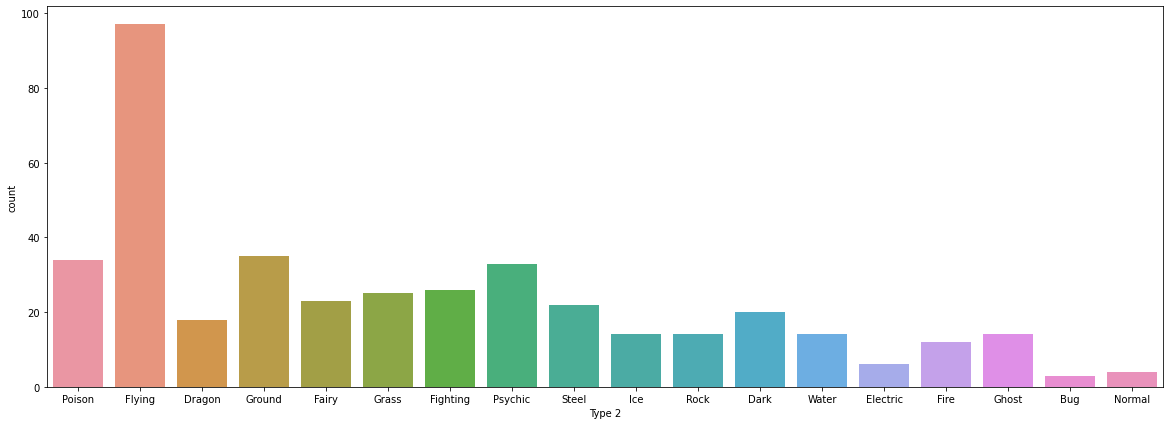

In [35]:
plt.figure(figsize=(20,7))
sns.countplot(x=pokemon_data["Type 2"])
plt.show()

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x=exercise_data.kind,y=exercise_data.pulse,hue=exercise_data.diet)
plt.show()

<Figure size 720x504 with 0 Axes>

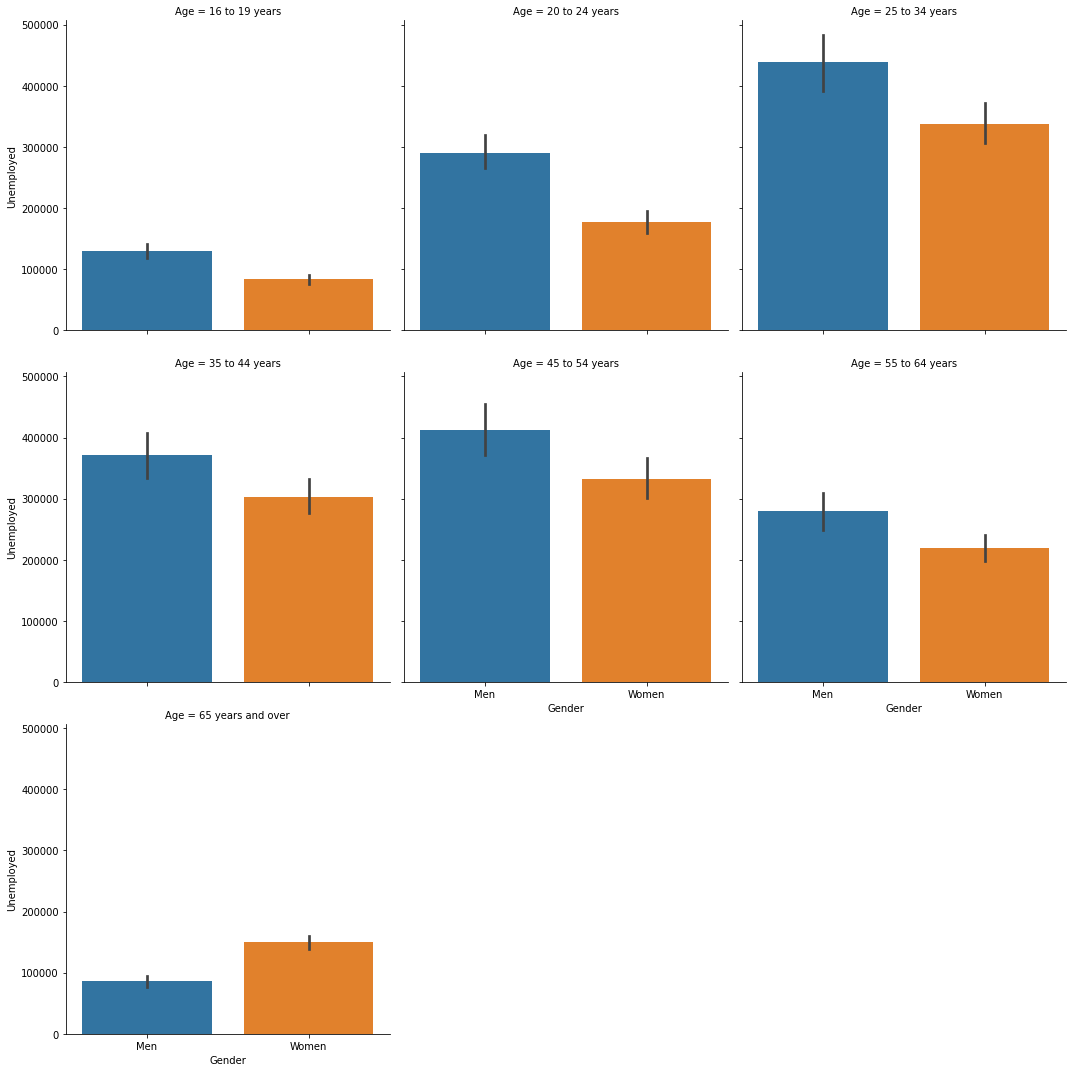

In [37]:
plt.figure(figsize=(10,7))
sns.catplot(x="Gender",y="Unemployed",col="Age",col_wrap=3,data=unemployment_data,kind="bar")
plt.show()

In [38]:
plt.figure(figsize=(7,10))
sns.catplot(data=pokemon_data, y="Type 1",kind="count")
plt.show()

<Figure size 504x720 with 0 Axes>

<Figure size 720x504 with 0 Axes>

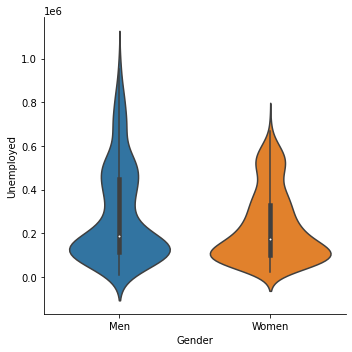

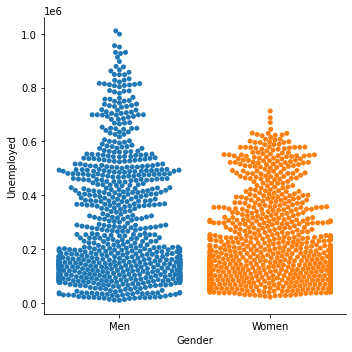

In [39]:
plt.figure(figsize=(10,7))
sns.catplot(x="Gender",y="Unemployed",data=unemployment_data
            ,kind="violin")
sns.catplot(x="Gender",y="Unemployed",data=unemployment_data
            ,kind="swarm")

plt.show()

In [40]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [41]:
num = np.random.normal(1,10,1000)
sns.distplot(num,kde=True,rug=True)
plt.show()

In [42]:
sns.distplot(num,hist=False,rug=True)
plt.show()

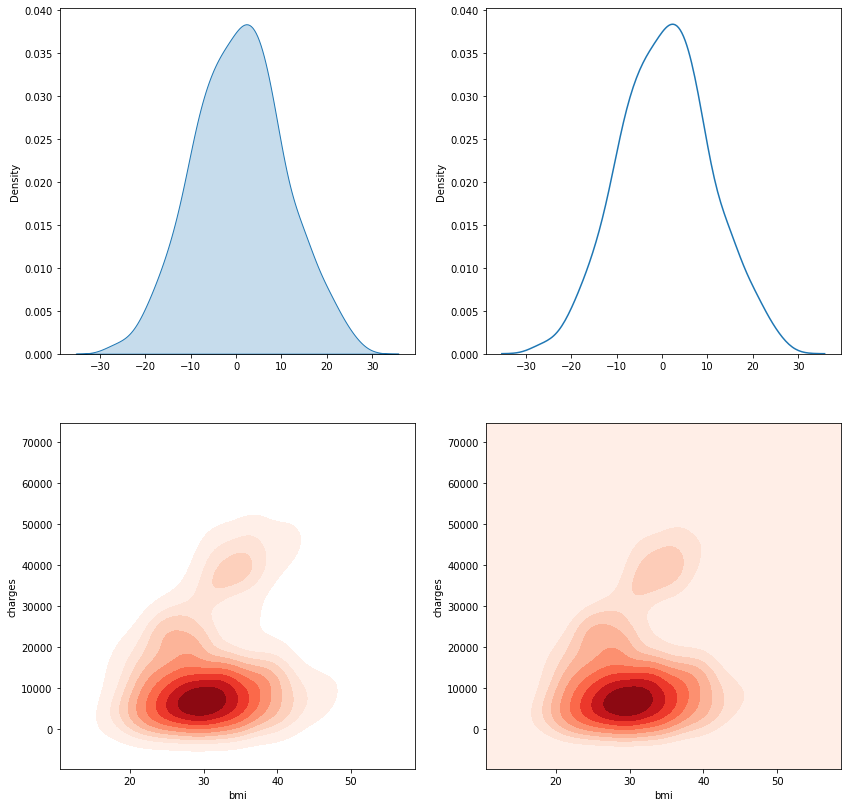

In [43]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
sns.kdeplot(num,shade=True,ax=axes[0,0])
sns.kdeplot(num,ax=axes[0,1])
sns.kdeplot(insurance_data.bmi,insurance_data.charges,shade=True,cmap="Reds",shade_lowest=False,ax=axes[1,0])
sns.kdeplot(insurance_data.bmi,insurance_data.charges,shade=True,cmap="Reds",shade_lowest=True,ax=axes[1,1])
plt.show()

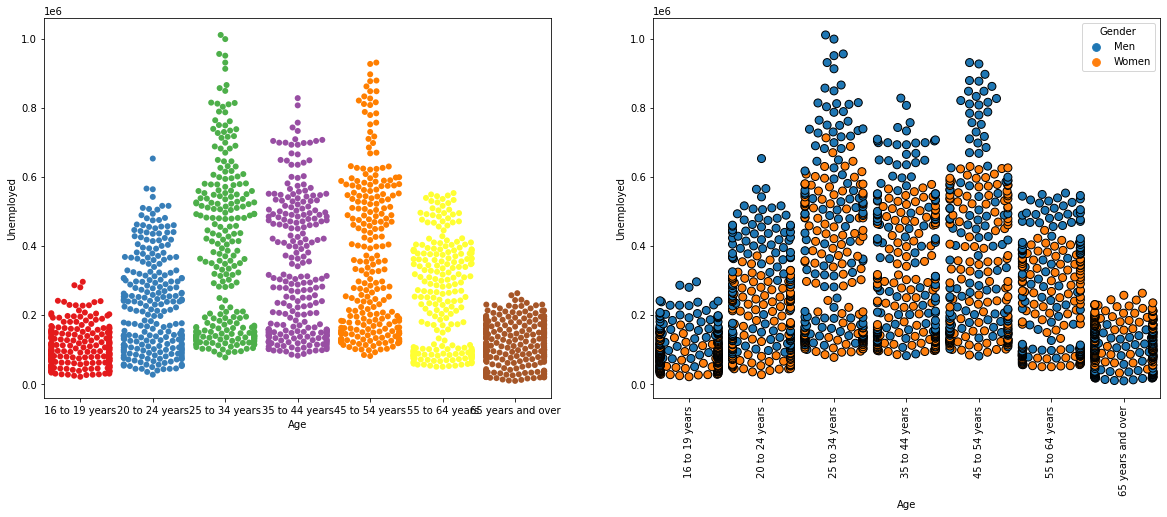

In [44]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.swarmplot(x=unemployment_data.Age,y=unemployment_data.Unemployed,palette="Set1",size=6,ax=axes[0])

sns.swarmplot(x=unemployment_data.Age,y=unemployment_data.Unemployed,ax=axes[1],
                hue=unemployment_data.Gender,edgecolor="black",linewidth=1,size=8)
plt.xticks(rotation=90)
plt.show()


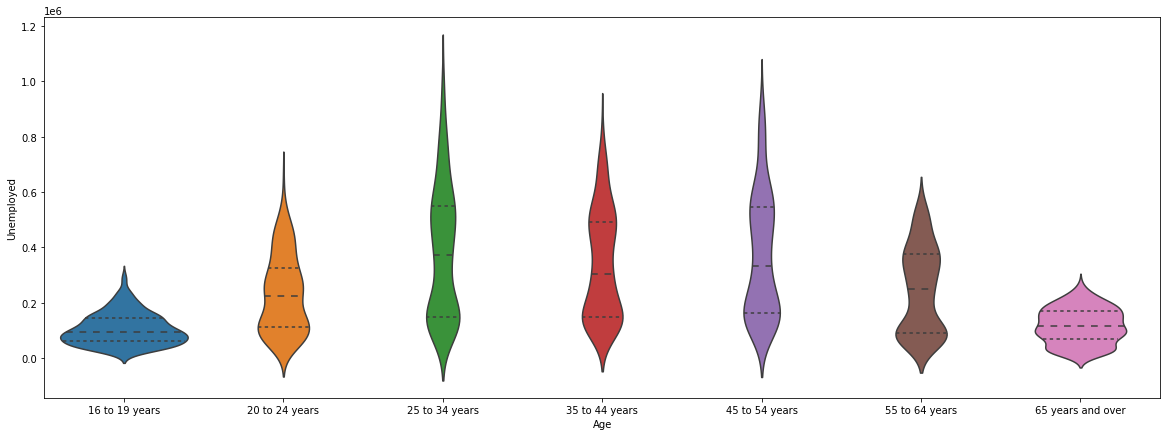

In [45]:
plt.figure(figsize=(20,7))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],inner="quartile")
plt.show()

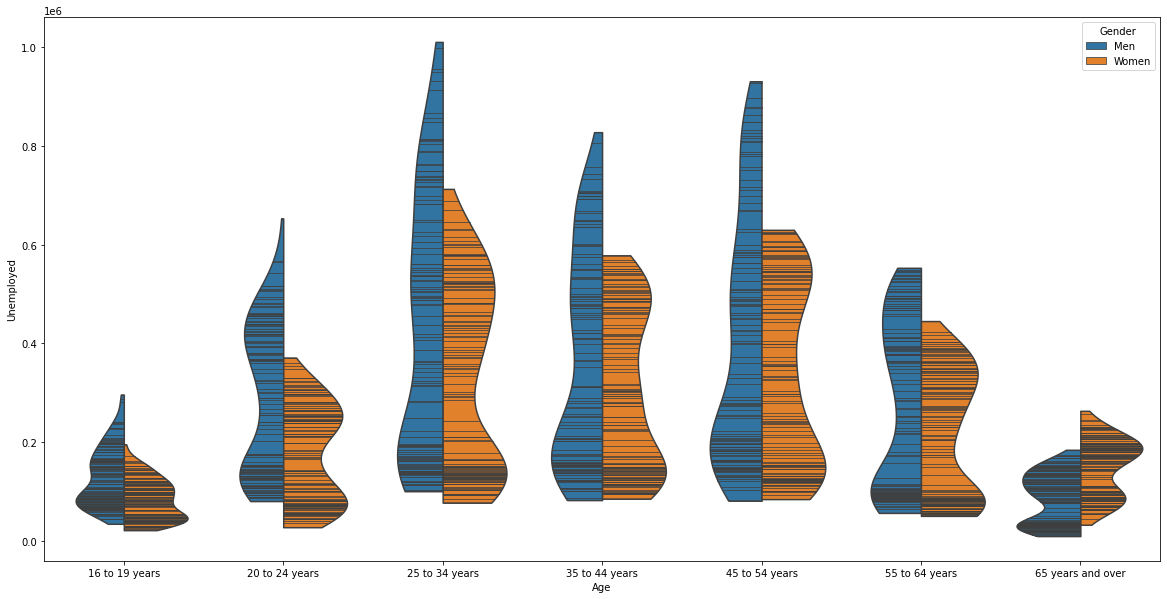

In [46]:
plt.figure(figsize=(20,10))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],split=True,inner="stick",cut=0)
plt.show()

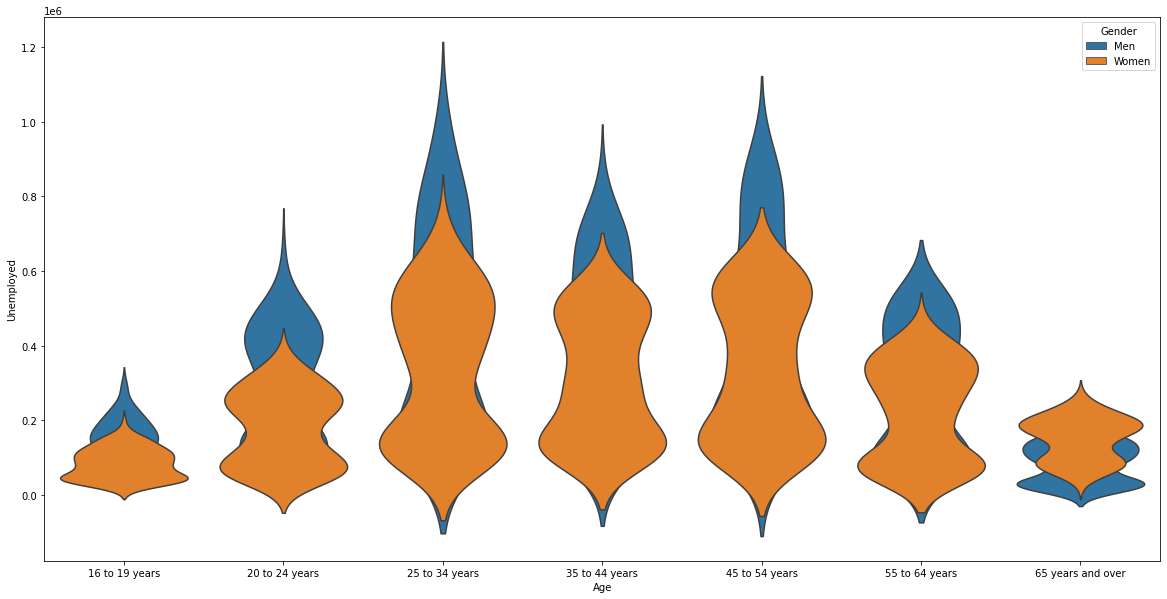

In [47]:
plt.figure(figsize=(20,10))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],split=False,dodge=False,inner=None)
plt.show()

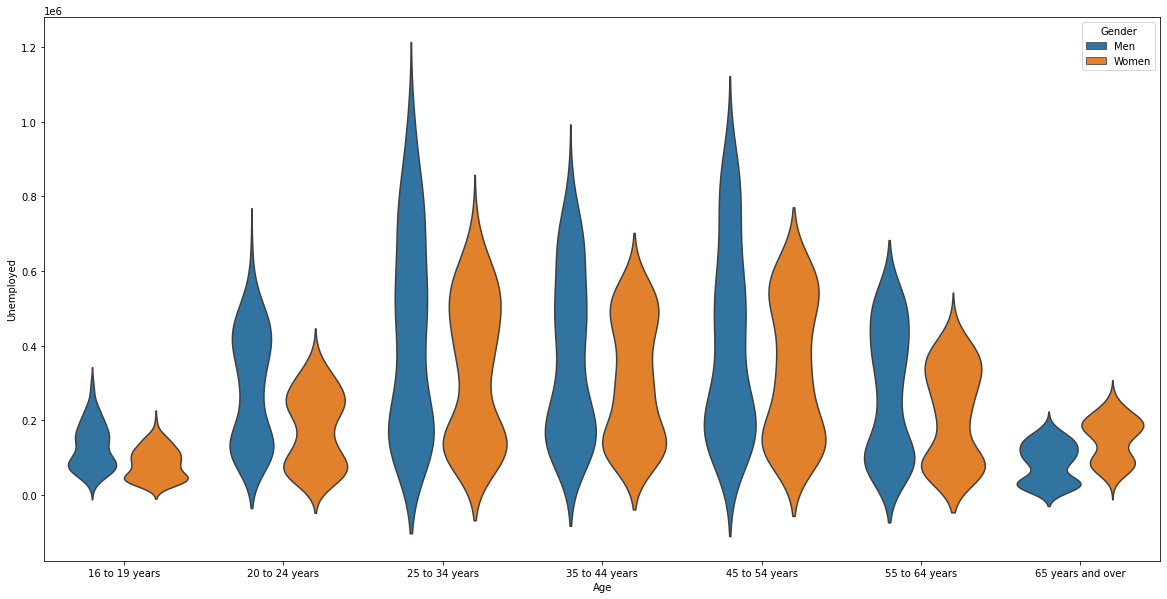

In [48]:
plt.figure(figsize=(20,10))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],inner=None)
plt.show()

In [49]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
sns.set_style("white")

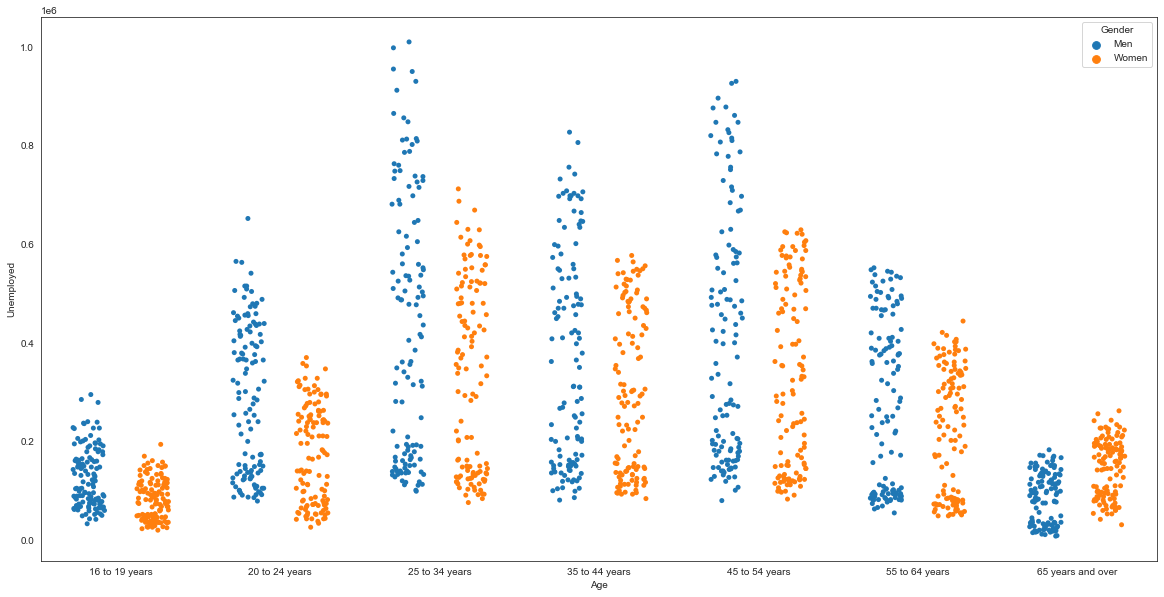

In [50]:
plt.figure(figsize=(20,10))
sns.stripplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],split=True,jitter=0.2)
plt.show()

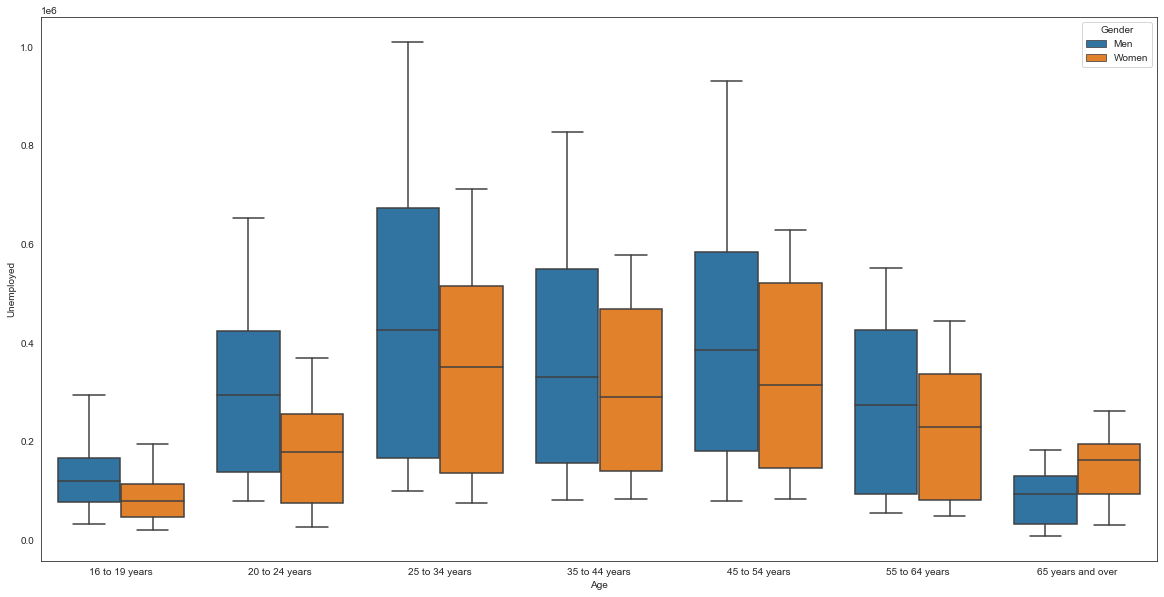

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],fliersize=15) # filersize for outlier data size
plt.show()

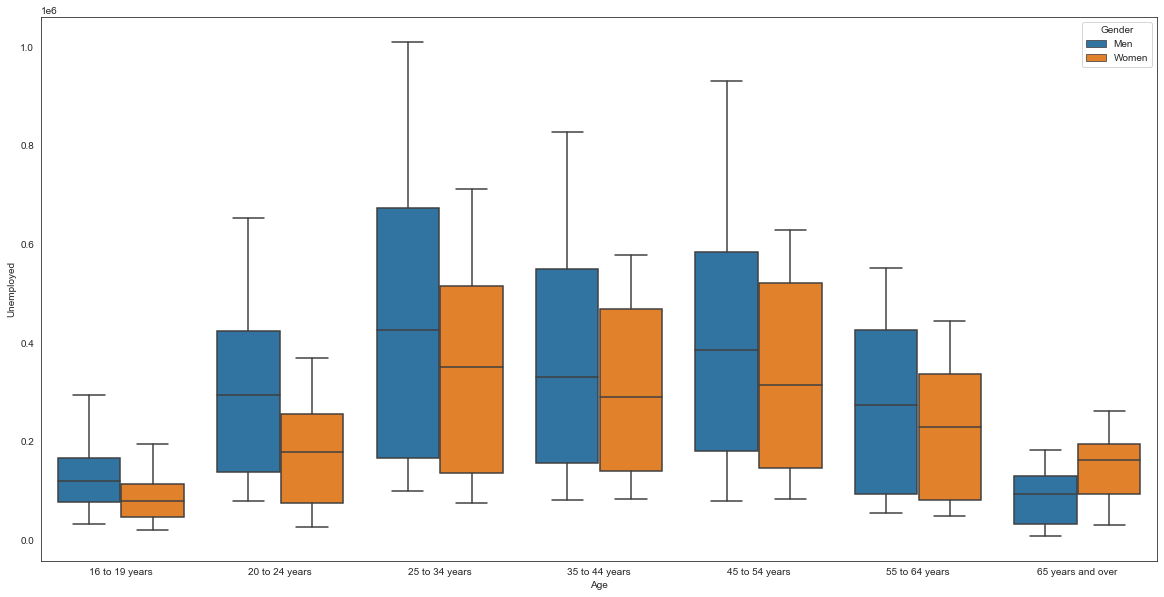

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],fliersize=15) # filersize for outlier data size
plt.show()

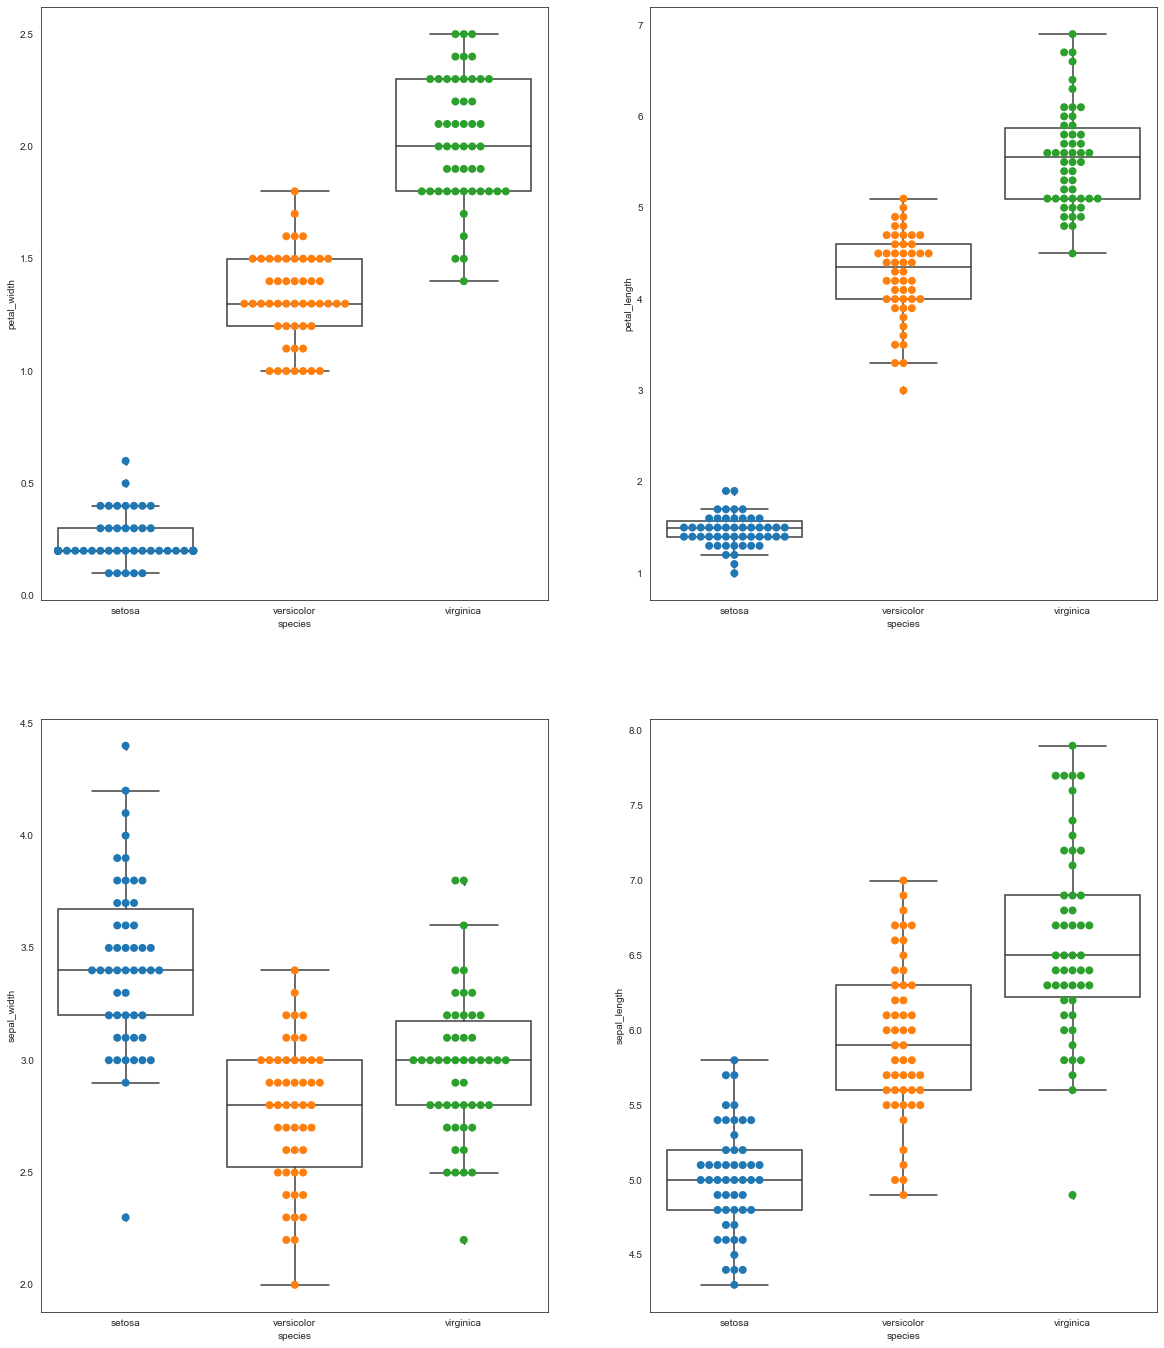

In [53]:
fig1 , axes = plt.subplots(nrows=2,ncols=2 , figsize = (20,24))
sns.swarmplot(x="species" , y = "petal_width" , ax = axes[0,0] ,data=iris_data, size=8,)
sns.boxplot(x="species" , y = "petal_width" , ax = axes[0,0] ,data=iris_data ,boxprops={'facecolor':'None'})
sns.swarmplot(x="species" , y = "petal_length" ,ax = axes[0,1] , data=iris_data  , size=8)
sns.boxplot(x="species" , y = "petal_length" ,ax = axes[0,1] , data=iris_data ,boxprops={'facecolor':'None'})
sns.swarmplot(x="species" , y = "sepal_width" , ax = axes[1,0] , data=iris_data ,  size=8)
sns.boxplot(x="species" , y = "sepal_width" , ax = axes[1,0] , data=iris_data ,boxprops={'facecolor':'None'})
sns.swarmplot(x="species" , y = "sepal_length" , ax = axes[1,1] , data=iris_data, size=8)
sns.boxplot(x="species" , y = "sepal_length" , ax = axes[1,1] , data=iris_data ,boxprops={'facecolor':'None'})
plt.show()

In [54]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [55]:
plt.figure(figsize=(10,7))
sns.boxenplot(unemployment_data.Unemployed)

<AxesSubplot:xlabel='Unemployed'>

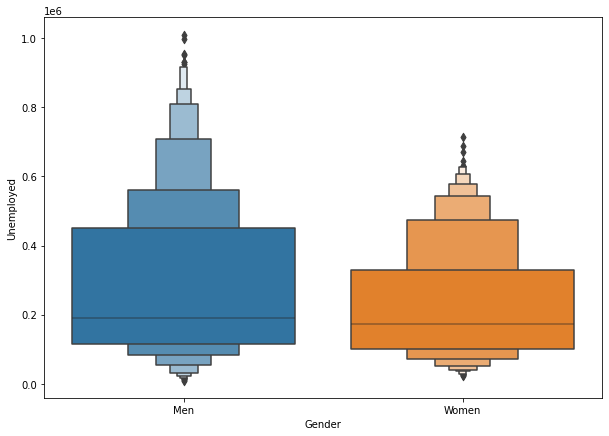

In [56]:
plt.figure(figsize=(10,7))
sns.boxenplot(x=unemployment_data.Gender,y=unemployment_data.Unemployed)
plt.show()

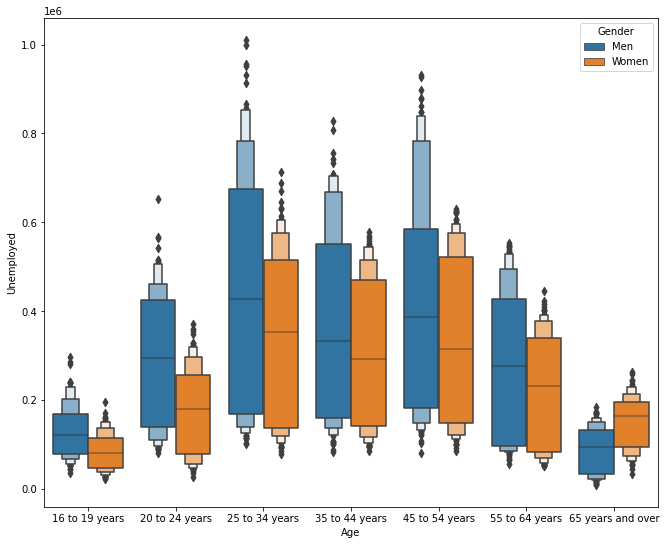

In [57]:
plt.figure(figsize=(11,9))
sns.boxenplot(x=unemployment_data.Age,y=unemployment_data.Unemployed,hue=unemployment_data.Gender)
plt.show()

<Figure size 792x648 with 0 Axes>

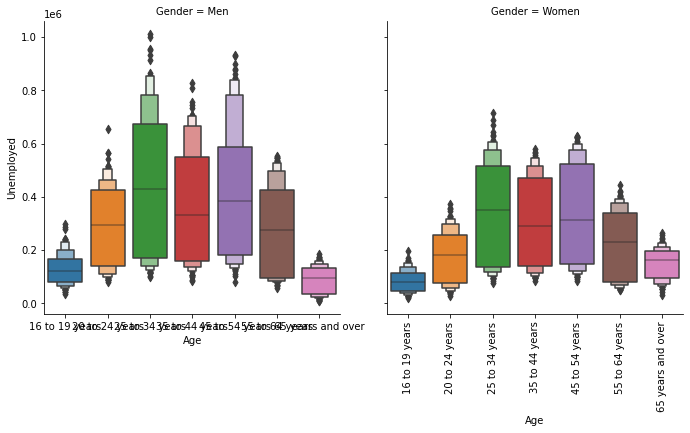

In [58]:
plt.figure(figsize=(11,9))
sns.catplot(x='Age',y='Unemployed',col='Gender',data=unemployment_data,kind='boxen')
plt.xticks(rotation=90)
plt.show()

In [59]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [60]:
fish_data1 = fish_data[fish_data['Species'].isin(['Bream','Perch','Pike'])]
fish_data1.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

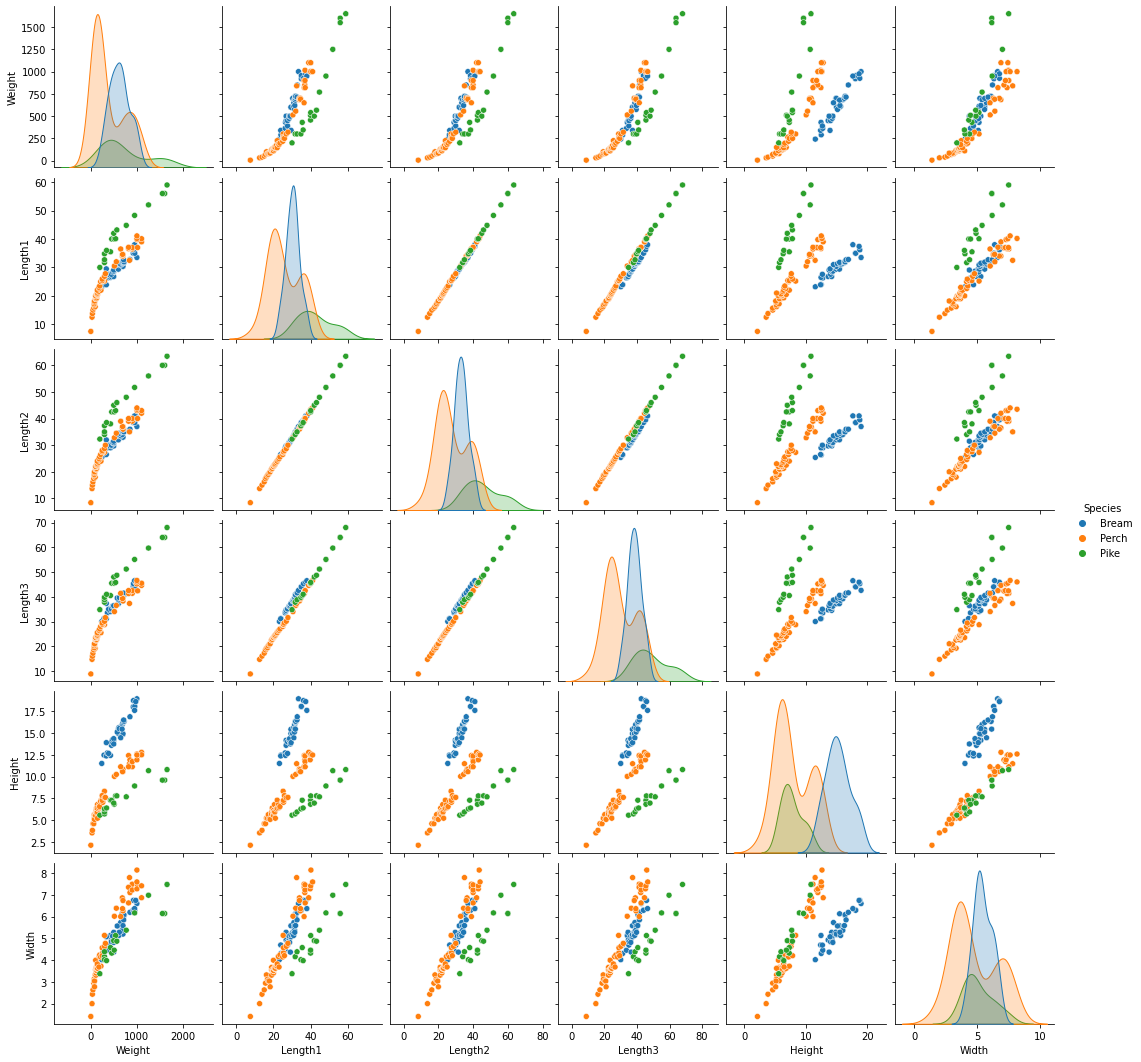

In [61]:
sns.pairplot(fish_data1,hue="Species")

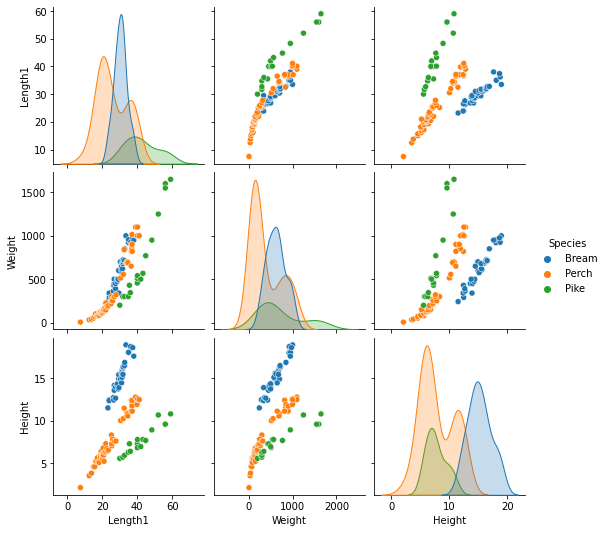

In [62]:
sns.pairplot(fish_data1,hue='Species',vars=['Length1','Weight','Height'])

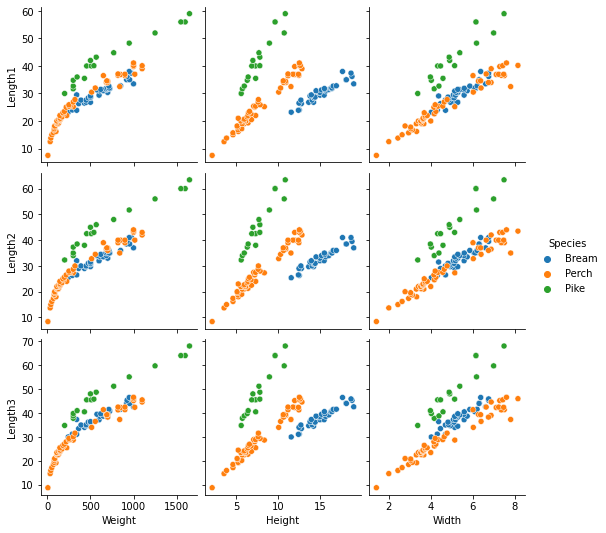

In [63]:
sns.pairplot(fish_data1,x_vars=['Weight','Height','Width'],y_vars=['Length1','Length2','Length3'],hue='Species')

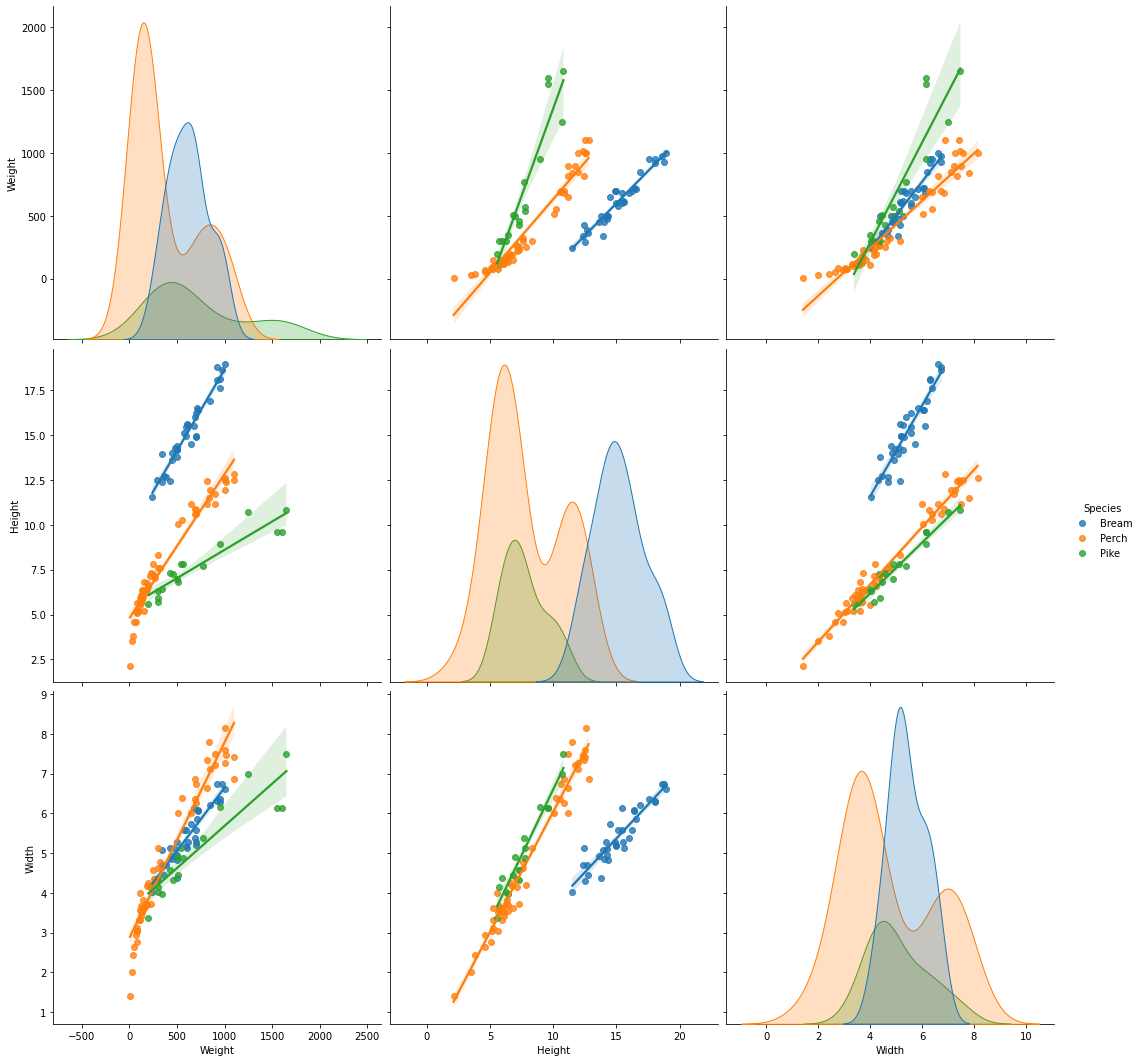

In [64]:
sns.pairplot(fish_data1,hue='Species',vars=['Weight','Height','Width'],kind='reg',height=5,aspect=1)

<AxesSubplot:xlabel='Weight', ylabel='Height'>

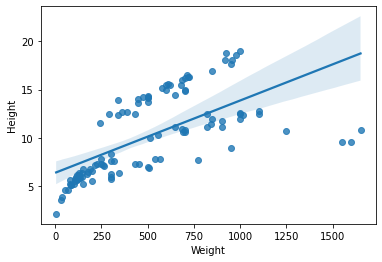

In [65]:
sns.regplot(x=fish_data1.Weight,y=fish_data1.Height)

<AxesSubplot:xlabel='Weight', ylabel='Height'>

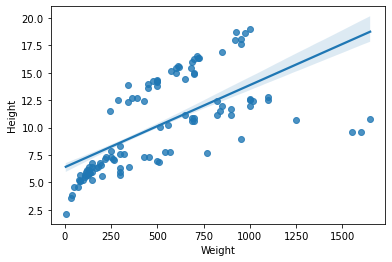

In [66]:
sns.regplot(x=fish_data1.Weight,y=fish_data1.Height,ci=50)

<AxesSubplot:xlabel='Weight', ylabel='Height'>

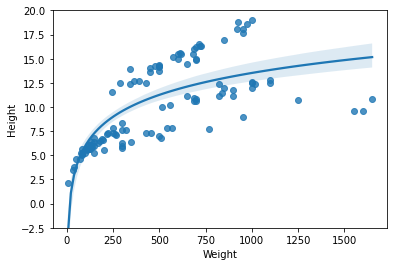

In [67]:
plt.ylim(-2.5,20)
sns.regplot(x=fish_data1.Weight,y=fish_data1.Height,logx=True)

In [68]:
#for polynomial regression use "order" parameter to select features
#robust regrssion - to ignore outlier - robust = True, 
#lowess = true for lowess regression 
#logx= True for logistic regression
# any one of the above can use at a time

In [69]:
#for categorical variable
#scatter_kws - for customizing scatter styles
#line_kws - for customizing line style
sns.lmplot(x="bmi",y="charges",hue="smoker",data=insurance_data)

In [70]:
sns.lmplot(x="bmi", y="charges", row="smoker", col="region", data=insurance_data ,height=4,aspect=1)


In [71]:
canada1 = canada_data.loc['2004': , ['Germany' , 'France' , 'Mexico' , 'Bangladesh' ,'Brazil','Israel' , 'Egypt' , 'Colombia' , 'Iraq','Jamaica']]
canada1.head()

Germany  France  Mexico  Bangladesh  Brazil  Israel  Egypt  Colombia  \
2004     2020    4391    2259        2660     917    2788   2393      4566   
2005     2226    4429    2837        4171     969    2446   2496      6424   
2006     2767    4002    2844        4014    1181    2625   2190      6535   
2007     2449    4290    3239        2897    1746    2401   2356      5357   
2008     3833    4532    2856        2939    2138    2562   3347      5452   

      Iraq  Jamaica  
2004  1796     2237  
2005  2226     1945  
2006  1788     1722  
2007  2406     2141  
2008  3543     2334

In [72]:
sns.heatmap(canada1)

<AxesSubplot:>

<AxesSubplot:>

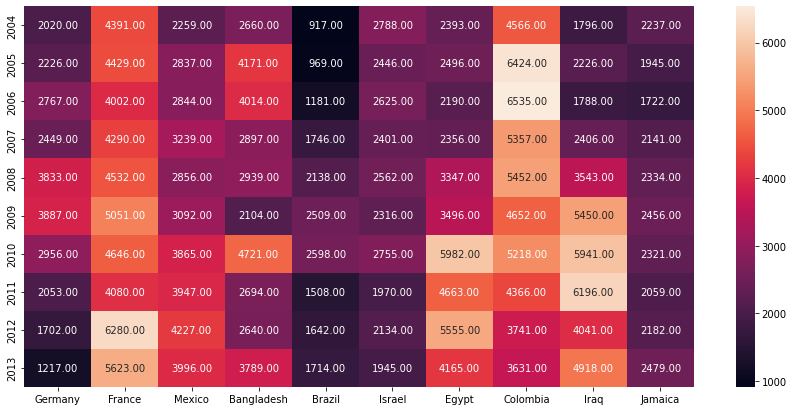

In [73]:
plt.figure(figsize=(15,7))
sns.heatmap(canada1,annot=True,fmt='.2f',square=False)

In [74]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [75]:
sns.set_style('darkgrid',{"grid.color": ".005", "grid.linestyle": "--"})
sns.jointplot(x='bmi',y='charges',data=insurance_data)

In [76]:
sns.jointplot(x="bmi",y="charges",data=insurance_data,kind="reg")

In [77]:
sns.jointplot(x="bmi",y="charges",data= insurance_data,kind="hex")

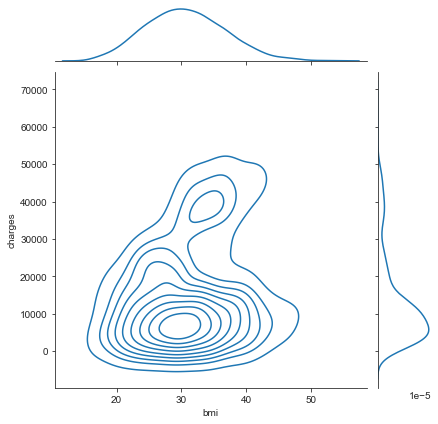

In [78]:
#marginal_kws - for marginal plot styling
sns.set_style("ticks")
sns.jointplot(x="bmi",y="charges",s=70,data=insurance_data,kind="kde",linewidth=6)

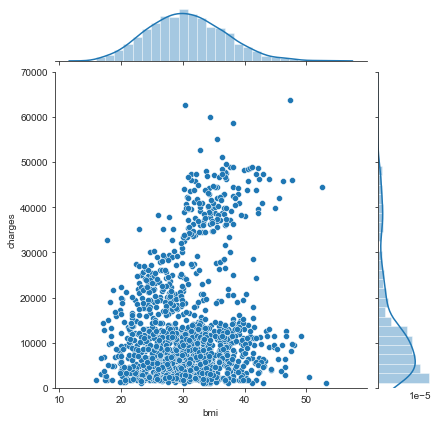

In [79]:
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data)
g.plot(sns.scatterplot,sns.distplot)
plt.ylim(0,70000)
plt.show()

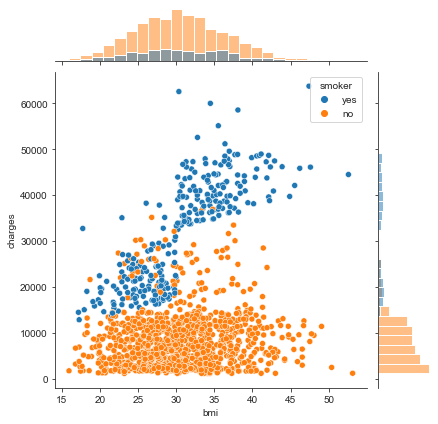

In [80]:
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g.plot(sns.scatterplot,sns.histplot)

In [81]:
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g = g.plot_marginals(sns.histplot,bins=10,kde=True)
g = g.plot_joint(sns.scatterplot)

In [82]:
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g = g.plot_marginals(sns.histplot,bins=10,kde=True)
g = g.plot_joint(sns.scatterplot)

In [89]:
x_mean , y_mean = round(insurance_data['bmi'].mean()),round(insurance_data['charges'].mean())

g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g = g.plot_marginals(sns.histplot,bins=15,kde=True)
g = g.plot_joint(sns.scatterplot)
g.refline(x=x_mean,y=y_mean)


You should consider upgrading via the 'c:\users\barka\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_figure', '_hue_params', '_inject_kwargs', 'ax_joint', 'ax_marg_x', 'ax_marg_y', 'fig', 'figure', 'hue', 'plot', 'plot_joint', 'plot_marginals', 'refline', 'savefig', 'set', 'set_axis_labels', 'x', 'y']


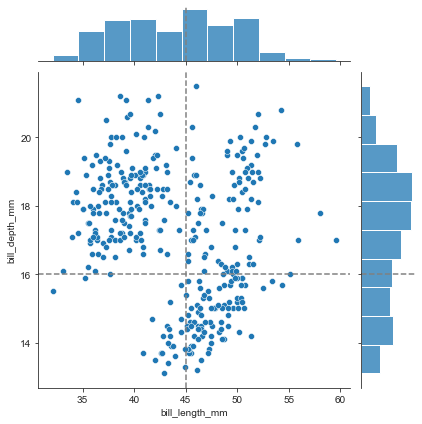

In [86]:
penguins = sns.load_dataset("penguins")
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=16)

Package                           Version
--------------------------------- -------------------
absl-py                           0.13.0
addict                            2.4.0
aiofiles                          0.6.0
alembic                           1.6.5
altair                            4.1.0
altgraph                          0.17
ansi2html                         1.6.0
argon2-cffi                       20.1.0
astor                             0.8.1
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
backcall                          0.2.0
backports.entry-points-selectable 1.1.0
base58                            2.1.0
bleach                            3.3.0
blinker                           1.4
bokeh                             2.3.2
Brotli                            1.0.9
cachetools                        4.2.2
certifi                           2020.12.5
cffi                              1.14.5
chardet             

You should consider upgrading via the 'C:\Users\barka\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
